In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#定义alpha
# degree of confidence
Dconfidence=0.95
alpha=1-Dconfidence
t_u_index=1-alpha/2

In [3]:
#查表的t,u分位数

In [4]:
def sigma_known_plots(n,sigma=3,iteration=100,u_index=1.96):
    samples=[np.random.normal(loc=0,scale=3,size=n)for _ in range(iteration)]#loc:均值；std：标准差
    # print(len(samples[0]))
    # d1=np.random.normal(loc=0,scale=3,size=n)
    for i in np.arange(1,iteration,1):
        x_bar=np.mean(samples[i])#求平均
        interval_lowerbound=x_bar-u_index*sigma/np.sqrt(n)
        interval_upperbound=x_bar+u_index*sigma/np.sqrt(n)
        plots(x_bar,interval_lowerbound,interval_upperbound,i)
    plt.axvline(x=0,ymin=0,ymax=1)#中间这条竖线

In [5]:
def plots(x_mean,interval_lowerbound,interval_upperbound,i):
    if(interval_lowerbound>0)or interval_upperbound<0:#这里的0是mu的意思
        plt.plot((interval_lowerbound,interval_upperbound),(i,i),color='red',linewidth=0.5)
        plt.plot(np.mean(x_mean),i,'ro')
    else:
        plt.plot((interval_lowerbound,interval_upperbound),(i,i),color='blue',linewidth=0.5)
        plt.plot(np.mean(x_mean),i,'bo')

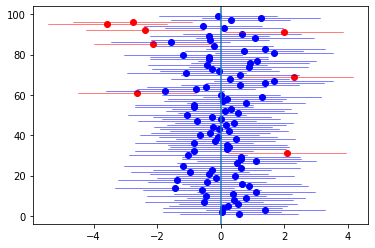

In [6]:
sigma_known_plots(10)

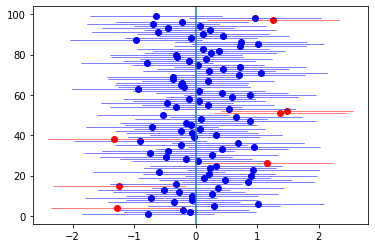

In [7]:
sigma_known_plots(30)

In [8]:
import scipy.stats as stats

In [9]:
def get_s(sample):
    sum=0
    # mean=np.mean(sample)
    # print(mean)
    for i in sample:
        sum=sum+(i-np.mean(sample))**2
    return np.sqrt(sum/(len(sample)-1))

In [10]:
get_s([14.85,13.01,13.5,14.93,16.97,13.8,17.95,13.37,16.29,12.38])

1.8431871551442862

In [11]:
def sigma_unknown_plots(n,iteration=100):
    samples=[np.random.normal(loc=0,scale=3,size=n)for _ in range(iteration)]#loc:均值；std：标准差
    # print(len(samples[0]))
    # d1=np.random.normal(loc=0,scale=3,size=n)
   #t(n-1)分布注意是n-1
    # print(stats.t.ppf((1+0.95)/2,n-1))
    for i in np.arange(1,iteration,1):
        x_bar=np.mean(samples[i])#求平均
        t_index=stats.t.ppf((1+0.95)/2,len(samples[i])-1)
        s=get_s(samples[i])
        interval_lowerbound=x_bar-t_index*s/np.sqrt(n)
        interval_upperbound=x_bar+t_index*s/np.sqrt(n)
        plots(x_bar,interval_lowerbound,interval_upperbound,i)
    plt.axvline(x=0,ymin=0,ymax=1)#中间这条竖线

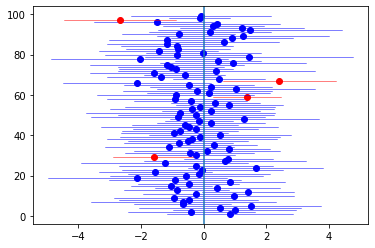

In [12]:
sigma_unknown_plots(10)

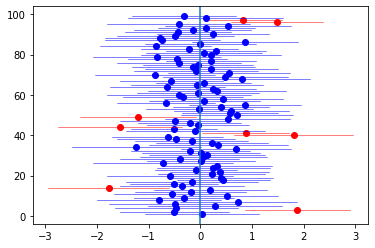

In [13]:
sigma_unknown_plots(30)

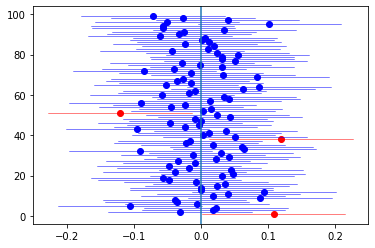

In [18]:
sigma_known_plots(3000)

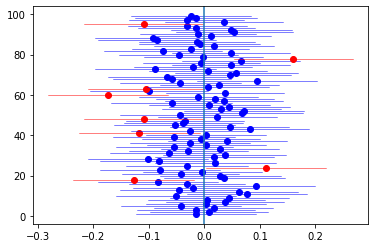

In [21]:
sigma_unknown_plots(3000)

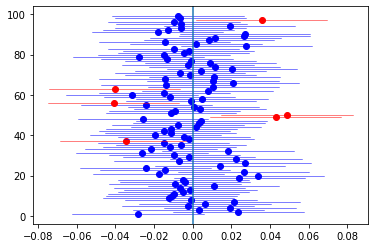

In [22]:
sigma_unknown_plots(30000)

In [16]:
stats.t.ppf((1+0.95)/2,3000-1)

1.9607553192053147